In [2]:
!pip install selenium

In [2]:
import selenium

In [3]:
from selenium import webdriver
import pandas as pd
from selenium.webdriver.common.by import By
import warnings
warnings.filterwarnings("ignore")
import time
from bs4 import BeautifulSoup
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import requests

In [ ]:
Q1. Write a python program which searches all the product under a particular product from www.amazon.in. The
product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for
guitars. 
In the above question, now scrape the following details of each product listed in first 3 pages of your search
results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then
scrape all the products available under that product name. Details to be scraped are: "Brand
Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and
“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“. 

In [106]:
driver = webdriver.Chrome()
driver.get("https://www.amazon.in/")

In [107]:
designation1=driver.find_element(By.XPATH, "/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
designation1.send_keys('Samsung Flip 5')
search=driver.find_element(By.XPATH, "/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search.click()
time.sleep(3)

In [108]:
product_urls = []
start=0
end=3
for page in range(start, end):
        url=driver.find_elements(By.XPATH,'//a[@class = "a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
        for i in url:
            product_urls.append(i.get_attribute("href"))
        
        time.sleep(2)
        next_button = driver.find_element(By.XPATH,'//a[@class="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator"]')
        next_button.click()

In [102]:
print(product_urls)

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTozMzgxMDE3NTMxNTc2Njg4OjE3MDA0OTk4NTY6c3BfYXRmOjMwMDAyNDQ3NDgwMDMzMjo6MDo6&url=%2FSamsung-Galaxy-Flip5-Graphite-Storage%2Fdp%2FB0CB6BZ244%2Fref%3Dsr_1_1_sspa%3Fcrid%3D30VRT017XR4KT%26keywords%3DSamsung%2BFlip%2B5%26qid%3D1700499856%26sprefix%3D%252Caps%252C350%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1', 'https://www.amazon.in/Samsung-Galaxy-Flip5-256GB-Storage/dp/B0CB698HZL/ref=sr_1_2?crid=30VRT017XR4KT&keywords=Samsung+Flip+5&qid=1700499856&sprefix=%2Caps%2C350&sr=8-2', 'https://www.amazon.in/Samsung-Galaxy-Flip5-Cream-Storage/dp/B0CB67R3Y6/ref=sr_1_3?crid=30VRT017XR4KT&keywords=Samsung+Flip+5&qid=1700499856&sprefix=%2Caps%2C350&sr=8-3', 'https://www.amazon.in/Samsung-Galaxy-Flip5-Lavender-Storage/dp/B0CB68NF1W/ref=sr_1_4?crid=30VRT017XR4KT&keywords=Samsung+Flip+5&qid=1700499856&sprefix=%2Caps%2C350&sr=8-4', 'https://aax-eu.amazon.in/x/c/RLu2PXL7NENf2Mlbbfs3nwEAAAGL7bCciAMAAAH2AQBvbm9fdHhuX2JpZDEgICBvbm9fdHhuX2ltcDEg

In [109]:
print(len(product_urls))

18


In [110]:
Brand = []
for url in product_urls:
    driver.get(url)
    time.sleep(3)
    
    try:
        brand=driver.find_element(By.XPATH,'//span[@class="a-size-base po-break-word"]')
        Brand.append(brand.text)
    except NoSuchElementException:
        Brand.append('-')

In [112]:
print(Brand)

['Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung']


In [113]:
print(len(Brand))

18


In [115]:
Product_Name = []
for url in product_urls:
    driver.get(url)
    time.sleep(3)
    
    try:
        pn=driver.find_element(By.XPATH,'//span[@class="a-size-large product-title-word-break"]')
        Product_Name.append(pn.text)
    except NoSuchElementException:
        Product_Name.append('-')

In [117]:
print(len(Product_Name))

18


In [118]:
Product_Price = []
for url in product_urls:
    driver.get(url)
    time.sleep(3)
    
    try:
        pp=driver.find_element(By.XPATH,'//span[@class="a-price-whole"]')
        Product_Price.append(pp.text)
    except NoSuchElementException:
        Product_Price.append('-')

In [119]:
print(len(Product_Price))

18


In [121]:
Product_Availability = [] #No availability info
for url in product_urls:
    driver.get(url)
    time.sleep(3)
    
    try:
        pa=driver.find_element(By.XPATH,'//div[@class="a-section a-spacing-none a-spacing-top-micro"]/span')
        Product_Availability.append(pa.text)
    except NoSuchElementException:
        Product_Availability.append('-')

In [122]:
print(len(Product_Availability))

18


In [ ]:
Product_Return = [] #No return info
for url in product_urls:
    driver.get(url)
    time.sleep(3)
    
    try:
        pr=driver.find_element(By.XPATH,'//span[@class=""]')
        Product_Return.append(pr.text)
    except NoSuchElementException:
        Product_Return.append('-')

In [123]:
Product_Delivery = [] 
for url in product_urls:
    driver.get(url)
    time.sleep(3)
    
    try:
        pd=driver.find_element(By.XPATH,'//a[@class="a-link-normal"]/span')
        Product_Delivery.append(pd.text)
    except NoSuchElementException:
        Product_Delivery.append('-')

In [125]:
print(len(Product_Delivery))

18


In [ ]:
Q3. Write a python program to access the search bar and search button on images.google.com and scrape 10
images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’

In [181]:
driver=webdriver.Chrome()                                #Tried it my way
driver.get("https://images.google.com/")
time.sleep(5)

In [182]:
designation1=driver.find_element(By.CLASS_NAME, "gLFyf")
designation1.send_keys('fruits')

In [183]:
search=driver.find_element(By.CLASS_NAME, "zgAlFc")
search.click()












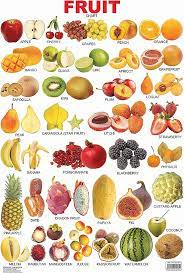
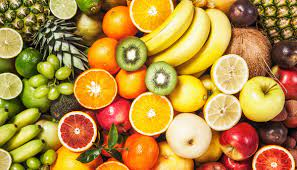
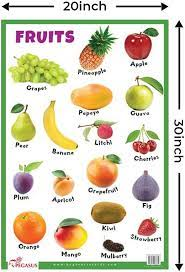
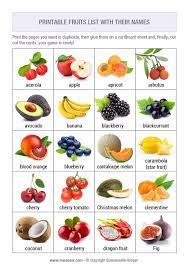
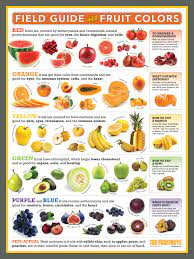
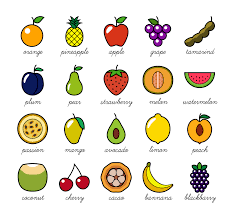
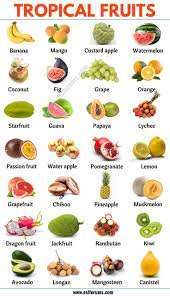
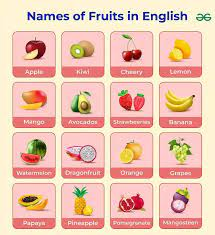
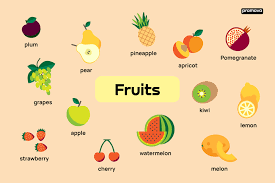
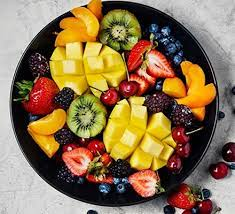

In [11]:
images = driver.find_elements(By.XPATH, '//img[contains(@class,"Q4LuWd")]')

image_urls = [img.get_attribute('src') for img in images[:10]]
for url in image_urls:
    print(url)

In [21]:
print(len(image_urls))

10


In [186]:
for _ in range(20):                                              #According to the session
    driver.execute_script("window.scrollBy(0,100)")
images=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
img_urls = []
for image in images:
    source=image.get_attribute('src')
    if source is not None:
        if(source[0:4]=='http'):
            img_urls.append(source)
for i in range(len(img_urls)):
    if i > 10:
        breakBy.XPATH,
    print("Downloading {0} of {1} images" .format(i,10))
    response=requests.get(img_urls[i])
    file=open(r"C:\Users\alvir\Downloads\pics"+str(i)+".jpg","wb")
    file.write(response.content)

In [213]:
driver=webdriver.Chrome()
driver.get("https://images.google.com/")
time.sleep(5)
designation1=driver.find_element(By.CLASS_NAME, "gLFyf")
designation1.send_keys('cars')
search=driver.find_element(By.CLASS_NAME, "zgAlFc")
search.click()

In [216]:
for _ in range(20):                                              #According to the session Not sure about the breakBy error
    driver.execute_script("window.scrollBy(0,100)")
images1=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
img_urls1 = []
for image in images1:
    source=image.get_attribute('src')
    if source is not None:
        if(source[0:4]=='http'):
            img_urls1.append(source)
for i in range(len(img_urls1)):
    if i >= 10:
        break
    print("Downloading {0} of {1} images" .format(i,10))
    response=requests.get(img_urls1[i])
    file=open(r"C:\Users\alvir\Downloads\pics"+str(i)+".jpg","wb")
    file.write(response.content)

In [203]:
driver=webdriver.Chrome()
driver.get("https://images.google.com/")
time.sleep(5)
designation1=driver.find_element(By.CLASS_NAME, "gLFyf")
designation1.send_keys('Machine Learning')
search=driver.find_element(By.CLASS_NAME, "zgAlFc")
search.click()

In [210]:
for _ in range(20):                                              #According to the session
    driver.execute_script("window.scrollBy(0,100)")
ML=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
img_urlml = []
for image in ML:
    source=image.get_attribute('src')
    if source is not None:
        if(source[0:4]=='http'):
            img_urlml.append(source)
for i in range(len(img_urlml)):
    if i >= 10:
        break
    print("Downloading {0} of {1} images" .format(i,10))
    response=requests.get(img_urlml[i])
    file=open(r"C:\Users\alvir\Downloads\pics"+str(i)+".jpg","wb")
    file.write(response.content)

In [218]:
driver=webdriver.Chrome()
driver.get("https://images.google.com/")
time.sleep(5)
designation1=driver.find_element(By.CLASS_NAME, "gLFyf")
designation1.send_keys('Guitar')
search=driver.find_element(By.CLASS_NAME, "zgAlFc")
search.click()

In [220]:
for _ in range(20):                                              #According to the session
    driver.execute_script("window.scrollBy(0,100)")
guitar=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
img_urlgt = []
for image in guitar:
    source=image.get_attribute('src')
    if source is not None:
        if(source[0:4]=='http'):
            img_urlgt.append(source)
for i in range(len(img_urlgt)):
    if i >= 10:
        break
    print("Downloading {0} of {1} images" .format(i,10))
    response=requests.get(img_urlgt[i])
    file=open(r"C:\Users\alvir\Downloads\pics"+str(i)+".jpg","wb")
    file.write(response.content)

In [221]:
driver=webdriver.Chrome()
driver.get("https://images.google.com/")
time.sleep(5)
designation1=driver.find_element(By.CLASS_NAME, "gLFyf")
designation1.send_keys('Cakes')
search=driver.find_element(By.CLASS_NAME, "zgAlFc")
search.click()

In [223]:
for _ in range(20):                                              #According to the session
    driver.execute_script("window.scrollBy(0,100)")
cakes=driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
img_urlck = []
for image in cakes:
    source=image.get_attribute('src')
    if source is not None:
        if(source[0:4]=='http'):
            img_urlck.append(source)
for i in range(len(img_urlck)):
    if i >= 10:
        break
    print("Downloading {0} of {1} images" .format(i,10))
    response=requests.get(img_urlck[i])
    file=open(r"C:\Users\alvir\Downloads\pics"+str(i)+".jpg","wb")
    file.write(response.content)

In [ ]:
#Not sure if others will have the same error or not but breakBy.XPATH is giving me name error and i am not sure why?
#it works perfectly for the first one and then it started giving errors. 

In [ ]:
Q4.Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com
and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand
Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”,
“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the
details is missing then replace it by “- “. Save your results in a dataframe and CSV

In [295]:
driver=webdriver.Chrome()
driver.get("https://www.flipkart.com/")

In [296]:
designation1=driver.find_element(By.CLASS_NAME, "Pke_EE")
designation1.send_keys('Oneplus Nord')

In [297]:
search=driver.find_element(By.XPATH,"/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/header/div[1]/div[2]/form/div/button")
search.click()

In [224]:
brand_name=[] 
product_name=[]
product_color=[] 
product_ram=[]    
product_storage=[] 
product_camera=[]
product_displays=[]  
product_battery=[]
product_warranty=[]
product_price=[]
product_url=[]

#Some of them had to be merged 

In [289]:
product_name=[]
start=0
end=1
for page in range(start,end):
    titles=driver.find_elements(By.CLASS_NAME, "_4rR01T")
    for i in titles[0:24]:
        product_name.append(i.text)
time.sleep(3)

In [290]:
print(product_name)

['OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)', 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256 GB)', 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)', 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)', 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128 GB)', 'OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)', 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128 GB)', 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)', 'OnePlus Nord CE3 5G (Aqua Surge, 128 GB)', 'OnePlus Nord CE3 5G (Grey Shimmer, 256 GB)', 'OnePlus Nord CE3 5G (Aqua Surge, 256 GB)', 'OnePlus Nord CE3 5G (Grey Shimmer, 128 GB)', 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256 GB)', 'OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)', 'OnePlus Nord 3 5G (Tempest Gray, 128 GB)', 'OnePlus Nord 3 5G (Misty Green, 128 GB)', 'OnePlus Nord 3 5G (Tempest Gray, 256 GB)', 'OnePlus Nord 3 5G (Misty Green, 256 GB)', 'OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256 GB)', 'OnePlus Nord CE 3 Lite 5G (Pastel lime, 256 GB)', 'OnePlus Nord CE 3 Li

In [291]:
print(len(product_name))

24


In [268]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

driver = webdriver.Chrome()

driver.get('https://www.flipkart.com/search?q=One%20Plus%20Nord&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off')

try:
    containers = driver.find_elements(By.CLASS_NAME, 'fMghEO')  #I am using the container here which contains a class which is similar for the 5 aspects
except NoSuchElementException:
    print("Nothing was found.")
    containers = []

Product_Data = []

for container in containers:
    try:
        details = container.find_elements(By.CLASS_NAME, 'rgWa7D')
        if len(details) >= 4: 
            ram = details[0].text
            display = details[1].text
            camera = details[2].text
            battery = details[3].text
            warranty = details[4].text if len(details) > 4 else 'No Warranty'

            Product_Data.append({
                'RAM': ram,
                'Display': display,
                'Camera': camera,
                'Battery': battery,
                'Warranty': warranty
            })

    except IndexError:
        print("Cannot show all the product elements.")
    except NoSuchElementException:
        print("Something is missing.")
    except Exception as e:
        print(f"Error occured: {e}")


In [269]:
print(Product_Data)

[{'RAM': '6 GB RAM | 128 GB ROM', 'Display': '16.74 cm (6.59 inch) Display', 'Camera': '64MP Rear Camera | 16MP Front Camera', 'Battery': '5000 mAh Battery', 'Warranty': '12 Months'}, {'RAM': '8 GB RAM | 128 GB ROM', 'Display': '17.07 cm (6.72 inch) Display', 'Camera': '108MP Rear Camera', 'Battery': '5000 mAh Battery', 'Warranty': 'Domestic Warranty of 12 months on phone & 6 months on accessories'}, {'RAM': '8 GB RAM | 256 GB ROM', 'Display': '17.07 cm (6.72 inch) Display', 'Camera': '108MP Rear Camera', 'Battery': '5000 mAh Battery', 'Warranty': 'Domestic Warranty of 12 months on phone & 6 months on accessories'}, {'RAM': '8 GB RAM | 256 GB ROM', 'Display': '17.07 cm (6.72 inch) Display', 'Camera': '108MP Rear Camera', 'Battery': '5000 mAh Battery', 'Warranty': 'Domestic Warranty of 12 months on phone & 6 months on accessories'}, {'RAM': '8 GB RAM | 128 GB ROM', 'Display': '17.07 cm (6.72 inch) Display', 'Camera': '108MP Rear Camera', 'Battery': '5000 mAh Battery', 'Warranty': 'Domes

In [272]:
product_prices = []
start=0
end=1
for page in range(start,end):
        price_elements = driver.find_elements(By.CLASS_NAME, '_30jeq3')
for price_element in price_elements[0:24]:
        price_text = price_element.text.split('\n')[0]
        product_prices.append(price_text)
print(product_prices)


['₹17,123', '₹19,899', '₹21,720', '₹21,815', '₹19,642', '₹17,140', '₹19,836', '₹21,990', '₹28,576', '₹21,978', '₹21,953', '₹19,970', '₹28,680', '₹25,290', '₹25,628', '₹31,824', '₹21,995', '₹19,924', '₹35,988', '₹33,744', '₹37,495', '₹33,990', '₹22,689', '₹28,990']


In [265]:
product_url = []
start=0
end=1
for page in range(start,end):
        url_elements = driver.find_elements(By.XPATH, '//a[@class="_1fQZEK"]') 
for i in url_elements[0:24]:
        url=(i.get_attribute('href'))
        product_url.append(url)
print(product_url)


['https://www.flipkart.com/oneplus-nord-ce-2-lite-5g-blue-tide-128-gb/p/itm7acae55b999e6?pid=MOBGMFREBAHZQGY9&lid=LSTMOBGMFREBAHZQGY9Q4Y47L&marketplace=FLIPKART&q=Oneplus+Nord&store=tyy%2F4io&spotlightTagId=BestsellerId_tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=Search&iid=e04712b0-5e7e-416f-b218-9522e53cde8b.MOBGMFREBAHZQGY9.SEARCH&ppt=sp&ppn=sp&ssid=k363r6gj3k0000001699640630874&qH=53863d4d978d5074', 'https://www.flipkart.com/oneplus-nord-ce-3-lite-5g-chromatic-gray-128-gb/p/itm2cd5a4e659035?pid=MOBGZJ42KHUZZKMN&lid=LSTMOBGZJ42KHUZZKMNLYQNYO&marketplace=FLIPKART&q=Oneplus+Nord&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=e04712b0-5e7e-416f-b218-9522e53cde8b.MOBGZJ42KHUZZKMN.SEARCH&ppt=hp&ppn=homepage&ssid=k363r6gj3k0000001699640630874&qH=53863d4d978d5074', 'https://www.flipkart.com/oneplus-nord-ce-3-lite-5g-chromatic-gray-256-gb/p/itm2cd5a4e659035?pid=MOBGZJ45PS4AQ7BA&lid=LSTMOBGZJ45PS4AQ7BAVG4WVP&marketplace=FLIPKART&q=Oneplus+Nord&store=t

In [266]:
print(len(product_url))

24


In [292]:
product_name_series = pd.Series(product_name, name="Product Name")
product_url_series = pd.Series(product_url, name="Product URL")
product_prices_series = pd.Series(product_prices, name="Product Price")
product_data_df = pd.DataFrame(Product_Data)

merged_df = pd.concat([product_name_series, product_data_df, product_prices_series, product_url_series], axis=1)


In [293]:
merged_df

,Product Name,RAM,Display,Camera,Battery,Warranty,Product Price,Product URL
0,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)",6 GB RAM | 128 GB ROM,16.74 cm (6.59 inch) Display,64MP Rear Camera | 16MP Front Camera,5000 mAh Battery,12 Months,"₹17,123",https://www.flipkart.com/oneplus-nord-ce-2-lit...
1,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 256...",8 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 mo...,"₹19,899",https://www.flipkart.com/oneplus-nord-ce-3-lit...
2,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 mo...,"₹21,720",https://www.flipkart.com/oneplus-nord-ce-3-lit...
3,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)",8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 mo...,"₹21,815",https://www.flipkart.com/oneplus-nord-ce-3-lit...
4,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128...",8 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 mo...,"₹19,642",https://www.flipkart.com/oneplus-nord-ce-3-lit...
5,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",6 GB RAM | 128 GB ROM,16.74 cm (6.59 inch) Display,64MP Rear Camera | 16MP Front Camera,5000 mAh Battery,12 months,"₹17,140",https://www.flipkart.com/oneplus-nord-ce-2-lit...
6,"OnePlus Nord CE 3 Lite 5G (Chromatic Gray, 128...",8 GB RAM | 128 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 mo...,"₹19,836",https://www.flipkart.com/oneplus-nord-ce-3-lit...
7,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 128 GB)",8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,"1 Year for handset ,6 months fro accessories","₹21,990",https://www.flipkart.com/oneplus-nord-ce-3-lit...
8,"OnePlus Nord CE3 5G (Aqua Surge, 128 GB)",12 GB RAM | 256 GB ROM,17.02 cm (6.7 inch) Display,50MP Rear Camera,5000 mAh Battery,Domestic 1 Year of Device & 6 Months for In-Bo...,"₹28,576",https://www.flipkart.com/oneplus-nord-ce3-5g-a...
9,"OnePlus Nord CE3 5G (Grey Shimmer, 256 GB)",8 GB RAM | 256 GB ROM,17.07 cm (6.72 inch) Display,108MP Rear Camera,5000 mAh Battery,Domestic Warranty of 12 months on phone & 6 mo...,"₹21,978",https://www.flipkart.com/oneplus-nord-ce-3-lit...


In [294]:
merged_df.to_csv('complete_product_data.csv', index=False)

In [ ]:
5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [234]:
driver=webdriver.Chrome()
driver.get("https://www.google.com/maps/")
time.sleep(5)


In [235]:
designation1=driver.find_element(By.CLASS_NAME, "searchboxinput")
designation1.send_keys('London')
search=driver.find_element(By.CLASS_NAME, "mL3xi")
search.click()


In [236]:
import re
latitude = []
longitude = []
try:
    url_string = driver.current_url
    print("URL Extracted:", url_string)
    lat_lng_match = re.search(r'/@([-.\d]+),([-.\d]+)', url_string)
    
    if lat_lng_match:
        latitude = lat_lng_match.group(1)
        longitude = lat_lng_match.group(2)
        print("Latitude:", latitude)
        print("Longitude:", longitude)
    else:
        print("not found")
except Exception as e:
    print("An error occured:", e)

URL Extracted: https://www.google.com/maps/place/London/@51.3784448,-0.1051823,14z/data=!4m6!3m5!1s0x47d8a00baf21de75:0x52963a5addd52a99!8m2!3d51.5072178!4d-0.1275862!16zL20vMDRqcGw?entry=ttu
Latitude: 51.3784448
Longitude: -0.1051823


In [ ]:
6. Write a program to scrap all the available details of best gaming laptops from digit.in. 

In [69]:
driver=webdriver.Chrome()
driver.get("https://www.digit.in")
time.sleep(5)

In [72]:
search=driver.find_element(By.CLASS_NAME, "dl-trigger")
search.click()

In [73]:
searchs=driver.find_element(By.XPATH, '/html/body/div[4]/div/ul/li[4]')
searchs.click()

In [74]:
search1=driver.find_element(By.XPATH, "/html/body/div[1]/div[3]/div/div[2]/div[1]/div[3]/div[6]/p")
search1.click()

In [75]:
product_name1 = []
titles=driver.find_elements(By.XPATH,'//h3[contains(@class,"font130 mt0 mb10 mobilesblockdisplay")]')
for i in titles:
        product_name1.append(i.text)
time.sleep(3)
print(len(product_name1))

6


In [25]:
elements = driver.find_elements(By.CLASS_NAME, 'meta_v_value')

for i in range(0, len(elements), 4):
    if i + 3 < len(elements):  
        display_size = elements[i+1].text
        resolution = elements[i+2].text
        processor = elements[i+3].text

        print(f"Operating System: {os}")
        print(f"Display Size: {display_size}")
        print(f"Resolution: {resolution}")
        print(f"Processor: {processor}")
    


Operating System: iOS
Display Size: 13.6
Resolution: 2560 x 1600
Processor: Apple M2
Operating System: Windows 11 Home
Display Size: 14
Resolution: 2880 x 1800
Processor: 13th Gen Intel Core i7-1360P
Operating System: Mac
Display Size: 14.2
Resolution: Windows 11
Processor: 13.4
Operating System: 3840 x 2400
Display Size: 12th Gen Intel EVO Core i7-1260P
Resolution: Windows 11 Home
Processor: 16


In [76]:
product_urls = []
url=driver.find_elements(By.XPATH, '//h3[contains(@class, "font130")]//a')
for i in url:
    product_urls.append(i.get_attribute("href"))
       

In [77]:
print(len(product_urls))

6


In [84]:
os = []                       #All the pages have different structures. 
processor=[]
drive=[]
display=[]

for url in product_urls:
    driver.get(url)
    time.sleep(3)
    
elements = driver.find_elements(By.CLASS_NAME, 'value')

try:
    for i in range(0, len(elements), 4):
        if i + 3 < len(elements): 
            os=elements[i].text
            processor = elements[i+1].text
            drive = elements[i+2].text
            display = elements[i+3].text

        print(f"Operating System: {os}")
        print(f"processor: {processor}")
        print(f"Storage Drive: {drive}")
        print(f"display: {display}")
        
except NoSuchElementException:
        os.append('-')
        processor.append('-')
        drive.append('-')
        display.append('-')

Operating System: Operating System (With
Windows 11 Home
processor: Processor Model Name
11th Gen Intel Core I7-11390H
Storage Drive: Storage Drive Capacity
1 TB
display: Display Size (In Inches)
16


In [ ]:
7. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped:
“Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”. 

In [275]:
from bs4 import BeautifulSoup
from selenium import webdriver

driver = webdriver.Chrome()
driver.get('https://www.forbes.com/billionaires/')

In [277]:
Rank=[]
Name=[]
Net_worth=[]
Age=[]
Country=[]
Source=[]
Industry=[]

Details=[i.text.split('\n') for i in driver.find_elements(By.XPATH,"//div[@class='TableRow_row__L-0Km']")]

for i in Details:
    Rank.append(i[0])
    Name.append(i[1])
    Net_worth.append(i[2])
    Age.append(i[3])
    Country.append(i[4])
    Source.append(i[5])
    Industry.append(i[6])


In [278]:
print(Details)

[['2', 'Elon Musk', '$180 B', '51', 'United States', 'Tesla, SpaceX', 'Automotive'], ['3', 'Jeff Bezos', '$114 B', '59', 'United States', 'Amazon', 'Technology'], ['4', 'Larry Ellison', '$107 B', '78', 'United States', 'Oracle', 'Technology'], ['5', 'Warren Buffett', '$106 B', '92', 'United States', 'Berkshire Hathaway', 'Finance & Investments'], ['6', 'Bill Gates', '$104 B', '67', 'United States', 'Microsoft', 'Technology'], ['7', 'Michael Bloomberg', '$94.5 B', '81', 'United States', 'Bloomberg LP', 'Media & Entertainment'], ['8', 'Carlos Slim Helu & family', '$93 B', '83', 'Mexico', 'Telecom', 'Telecom'], ['9', 'Mukesh Ambani', '$83.4 B', '65', 'India', 'Diversified', 'Diversified'], ['10', 'Steve Ballmer', '$80.7 B', '67', 'United States', 'Microsoft', 'Technology'], ['11', 'Francoise Bettencourt Meyers & family', '$80.5 B', '69', 'France', "L'Oréal", 'Fashion & Retail'], ['12', 'Larry Page', '$79.2 B', '50', 'United States', 'Google', 'Technology'], ['13', 'Amancio Ortega', '$77.3

In [280]:
data=pd.DataFrame({'Rank':Rank,'Name':Name,'Networth':Net_worth,'Age':Age,'Country':Country,'Source':Source,'Industry':Industry})
data

,Rank,Name,Networth,Age,Country,Source,Industry
0,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
1,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
2,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
3,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
4,6,Bill Gates,$104 B,67,United States,Microsoft,Technology
...,...,...,...,...,...,...,...
194,195,Jin Baofang,$9.6 B,70,China,Solar panels,Energy
195,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,Manufacturing
196,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",Food & Beverage
197,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",Food & Beverage


In [266]:
for _ in range(40):                                             
    driver.execute_script("window.scrollBy(0,500)")
billionaire_elements = driver.find_elements(By.CLASS_NAME, "TableRow_rowContainer__IC1Tv")
for i in billionaire_elements[0:200]:
    ranks_b= billionaire_elements[0].text 
    names_b = billionaire_elements[1].text 
    networth_b = billionaire_elements[2].text 
    ages_b = billionaire_elements[3].text  
    countries_b = billionaire_elements[4].text
    source_b =billionaire_elements[5].text
    industry_b = billionaire_elements[6].text 

print(f"Rank: {ranks_b}, Name: {names_b}, Networth: {networth_b}, Age: {ages_b} Country: {countries_b}, Source: {source_b}, Industry: {industry_b} ")

Rank: The 2023 List: Facts and Figures
Inside Forbes' 37th-annual billionaires ranking.
READ MORE
1
Bernard Arnault & family
$211 B
74
France
LVMH
Fashion & Retail
Bernard Arnault oversees the LVMH empire of 75 fashion and cosmetics brands, including Louis Vuitton and Sephora.
FULL PROFILE
WEALTH HISTORY
2
Elon Musk
$180 B
51
United States
Tesla, SpaceX
Automotive
3
Jeff Bezos
$114 B
59
United States
Amazon
Technology
4
Larry Ellison
$107 B
78
United States
Oracle
Technology
5
Warren Buffett
$106 B
92
United States
Berkshire Hathaway
Finance & Investments
6
Bill Gates
$104 B
67
United States
Microsoft
Technology
7
Michael Bloomberg
$94.5 B
81
United States
Bloomberg LP
Media & Entertainment
8
Carlos Slim Helu & family
$93 B
83
Mexico
Telecom
Telecom
9
Mukesh Ambani
$83.4 B
65
India
Diversified
Diversified
10
Steve Ballmer
$80.7 B
67
United States
Microsoft
Technology
11
Francoise Bettencourt Meyers & family
$80.5 B
69
France
L'Oréal
Fashion & Retail
12
Larry Page
$79.2 B
50
United Stat

In [ ]:
Q8. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted
from any YouTube Video

In [80]:
driver=webdriver.Chrome()
driver.get("https://www.youtube.com/watch?v=A5pSnIwbpaM")

In [404]:
time_stamp=[]
start=0
end=5
for page in range(start,end):
    titles=driver.find_elements(By.CLASS_NAME, "published-time-text")
    for i in titles[0:500]:
        time_stamp.append(i.text)
time.sleep(3)

In [406]:
print(time_stamp)

['2 weeks ago', '10 months ago', '3 weeks ago (edited)', '3 months ago', '1 month ago', '4 months ago', '2 weeks ago', '1 year ago (edited)', '3 months ago', '5 days ago', '3 days ago', '2 weeks ago', '3 months ago', '3 months ago', '1 day ago', '2 months ago (edited)', '8 days ago', '2 years ago', '3 months ago', '4 months ago', '1 month ago', '3 months ago', '3 weeks ago', '2 months ago', '2 years ago', '2 months ago', '4 months ago', '3 weeks ago', '4 months ago', '2 months ago', '2 years ago', '4 months ago', '2 weeks ago', '2 weeks ago', '4 months ago', '1 month ago', '2 years ago (edited)', '3 months ago', '3 months ago', '7 days ago', '2 months ago', '2 weeks ago', '1 year ago', '4 months ago', '2 days ago', '3 months ago', '1 month ago', '2 years ago', '4 months ago', '2 months ago', '2 weeks ago', '4 months ago', '2 weeks ago', '1 year ago', '5 months ago (edited)', '2 weeks ago', '2 weeks ago', '2 weeks ago (edited)', '10 hours ago', '1 year ago (edited)', '2 months ago', '4 

In [405]:
print(len(time_stamp))

500


In [408]:
comment_all=[]
start=0
end=5
for page in range(start,end):
    titles=driver.find_elements(By.ID, "content-text")
    for i in titles[0:500]:
        comment_all.append(i.text)
time.sleep(3)

In [409]:
print(comment_all)

['Party ready with #LekePrabhuKaNaam  Song OUT NOW - https://www.youtube.com/watch?v=6GxXehkPyBs', "It's January 2023, let's see how many legends still listening this masterpeice...", '10yrs passed still this song sounds so fresh and reminds old memories ', "It's not only a song, it's a memory", 'Kon Kon 2023 Mein Sun Raha Hai Meri Tarah ', "some songs are such a gem , it doesn't matter 10 Years passed away .. these kind of songs still remain in our hearts.", 'Salman and Katrina , one of the best duo of bollywood industry .  This song just brings back memories and feelings . ', "10 years completed but this song is still in people's heart️.. many  childhood memories attached to this song", 'A song that makes you enter into a storm of feelings, passion and love together at the same time', 'This song just brings back memories and feeling  everlasting masterpiece ', 'That was a golden era of Mohit Chauhan. Such an amazing voice', 'Such a gem of composition and true music.\nSoothing to ears

In [412]:
print(len(comment_all))

500


In [432]:
comment_upvote=[]
start=0
end=5
for page in range(start,end):
    titles=driver.find_elements(By.ID, "vote-count-middle")
    for i in titles[0:500]:
        comment_upvote.append(i.text)
time.sleep(3)

In [430]:
print(len(comment_upvote))

500


In [433]:
print(comment_upvote)

['202', '5.2K', '254', '309', '758', '235', '30', '5.6K', '79', '6', '8', '38', '130', '47', '3', '25', '4', '28K', '57', '46', '81', '33', '17', '40', '2.5K', '30', '44', '15', '73', '18', '4.2K', '24', '20', '11', '31', '10', '2.2K', '15', '18', '7', '12', '6', '594', '24', '2', '19', '5', '794', '7', '13', '1', '5', '11', '666', '2', '3', '5', '4', '2', '3.5K', '14', '6', '2', '11', '3', '1.3K', '7', '4', '3', '5', '2', '1.2K', '5', '7', '5', '7', '4', '675', '15', '2', '5', '11', '7', '353', '4', '5', '', '15', '7', '631', '11', '7', '2', '4', '5', '709', '13', '3', '5', '10', '202', '5.2K', '254', '309', '758', '235', '30', '5.6K', '79', '6', '8', '38', '130', '47', '3', '25', '4', '28K', '57', '46', '81', '33', '17', '40', '2.5K', '30', '44', '15', '73', '18', '4.2K', '24', '20', '11', '31', '10', '2.2K', '15', '18', '7', '12', '6', '594', '24', '2', '19', '5', '794', '7', '13', '1', '5', '11', '666', '2', '3', '5', '4', '2', '3.5K', '14', '6', '2', '11', '3', '1.3K', '7', '4', '

In [ ]:
Q9.Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in
“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall
reviews, privates from price, dorms from price, facilities and property description

#total review or overall reviews? not sure about this.

In [57]:
driver=webdriver.Chrome()
driver.get('https://www.hostelworld.com//')

In [58]:
designation3 = driver.find_element(By.CLASS_NAME, "native-input")
designation3.send_keys('London')

In [59]:
designation4=driver.find_element(By.CLASS_NAME, "btn-content")

In [62]:
try:
    search_button_CLASS_NAME_='btn-content'
    search_button = driver.find_element(By.CLASS_NAME, search_button_CLASS_NAME)
    search_button.click()
except NoSuchElementException:
        print("Search button not found")
except Exception as e:
    print(f"An error occurred: {e}")    #There is an error with the search button i tried several different and class and xpath. Another doubt for discussion

An error occurred: Message: element click intercepted: Element is not clickable at point (727, -222)
  (Session info: chrome=119.0.6045.124)
Stacktrace:
	GetHandleVerifier [0x00007FF754AA82B2+55298]
	(No symbol) [0x00007FF754A15E02]
	(No symbol) [0x00007FF7548D05AB]
	(No symbol) [0x00007FF754917A77]
	(No symbol) [0x00007FF754915E39]
	(No symbol) [0x00007FF754913C08]
	(No symbol) [0x00007FF754912C8A]
	(No symbol) [0x00007FF7549087BF]
	(No symbol) [0x00007FF7549320AA]
	(No symbol) [0x00007FF7549080CF]
	(No symbol) [0x00007FF7549322C0]
	(No symbol) [0x00007FF75494AAA4]
	(No symbol) [0x00007FF754931E83]
	(No symbol) [0x00007FF75490670A]
	(No symbol) [0x00007FF754907964]
	GetHandleVerifier [0x00007FF754E20AAB+3694587]
	GetHandleVerifier [0x00007FF754E7728E+4048862]
	GetHandleVerifier [0x00007FF754E6F173+4015811]
	GetHandleVerifier [0x00007FF754B447D6+695590]
	(No symbol) [0x00007FF754A20CE8]
	(No symbol) [0x00007FF754A1CF34]
	(No symbol) [0x00007FF754A1D062]
	(No symbol) [0x00007FF754A0D3A3

In [109]:
driver=webdriver.Chrome()
driver.get("https://www.hostelworld.com/pwa/wds/s?q=London,%20England&country=London&city=London&type=city&id=3&from=2023-11-12&to=2023-11-15&guests=2&page=1")

In [442]:
Hotel_Name=[]
start=0
end=1
for page in range(start,end):
    titles=driver.find_elements(By.CLASS_NAME, "property-name")
    for i in titles[0:32]:
        Hotel_Name.append(i.text)
time.sleep(3)

In [444]:
print(Hotel_Name)

["St Christopher's Village", 'Palmers Lodge - Swiss Cottage', "Wombat's City Hostel London", "St Christopher's Village", 'Onefam Notting Hill', 'Urbany Hostel London', 'Palmers Lodge - Swiss Cottage', 'Generator London', 'Safestay London Elephant & Castle', 'NX London Hostel', 'Safestay London Kensington Holland Park', 'Astor Museum Inn', 'Clink261', 'No.8 Willesden Hostel London', 'Smart Russell Square Hostel', 'Destinations Hostels @ The Gallery', 'Smart Hyde Park Inn Hostel', 'Phoenix Hostel', 'Queen Elizabeth Chelsea', 'The Walrus Hostel', 'No.8 Seven Sisters', 'Hostelle - women only hostel London', 'YHA London Oxford Street', "St Christopher's Hammersmith", 'Barmy Badger Backpackers', 'Prime Backpackers Angel', 'London Backpackers', 'Astor Victoria', 'Saint James Backpackers', 'Kabannas London St Pancras', "St Christopher's Inn - London Bridge", 'Astor Kensington']


In [446]:
Distance_City=[]
start=0
end=1
for page in range(start,end):
    titles=driver.find_elements(By.CLASS_NAME, "distance-description")
    for i in titles[0:32]:
        Distance_City.append(i.text)
time.sleep(3)
print(Distance_City)

['- 3.6km from city centre', '- 1.8km from city centre', '- 5.5km from city centre', '- 5.4km from city centre', '- 6.5km from city centre', '- 3km from city centre', '- 1.7km from city centre', '- 6.1km from city centre', '- 5.8km from city centre', '- 2.2km from city centre', '- 3.2km from city centre', '- 10km from city centre', '- 2.6km from city centre', '- 1.7km from city centre', '- 5km from city centre', '- 4.2km from city centre', '- 5.7km from city centre', '- 0.2km from city centre', '- 9km from city centre', '- 5.1km from city centre', '- 2.1km from city centre', '- 7.5km from city centre', '- 5.5km from city centre', '- 3.6km from city centre', '- 11.9km from city centre', '- 1.8km from city centre', '- 5.5km from city centre', '- 3.3km from city centre', '- 1.8km from city centre', '- 4.9km from city centre']


In [449]:
Rating=[]
start=0
end=1
for page in range(start,end):
    titles=driver.find_elements(By.CLASS_NAME, "number")
    for i in titles[0:32]:
        Rating.append(i.text)
time.sleep(3)
print(Rating)

['8.2', '8.8', '9.0', '8.2', '9.6', '9.5', '8.8', '7.5', '7.1', '8.3', '6.9', '8.4', '8.0', '7.1', '7.5', '9.2', '7.5', '7.1', '7.6', '8.3', '6.5', '8.8', '9.0', '7.6', '9.0', '8.1', '8.0', '7.1', '7.7', '8.3', '7.8', '8.6']


In [450]:
Total_Reviews=[]
start=0
end=1
for page in range(start,end):
    titles=driver.find_elements(By.CLASS_NAME, "review")
    for i in titles[0:32]:
        Total_Reviews.append(i.text)
time.sleep(3)
print(Total_Reviews)

['(15561)', '(12622)', '(2382)', '(1008)', '(15811)', '(7911)', '(5185)', '(2037)', '(1717)', '(9395)', '(447)', '(5137)', '(10139)', '(273)', '(6762)', '(4533)', '(3621)', '(4249)', '(4114)', '(76)', '(4673)', '(4335)', '(2008)', '(834)', '(4543)', '(15054)', '(1938)', '(2939)', '(3565)', '(6557)']


In [ ]:
#Not sure about the difference between total and overall review? - 

In [99]:
driver = webdriver.Chrome() 
driver.get('https://www.hostelworld.com/pwa/hosteldetails.php/St-Christopher-s-Village/London/502?from=2023-11-12&to=2023-11-15&guests=2') 
time.sleep(5) 
description_container = driver.find_element(By.CLASS_NAME, 'description-container')
property_description = description_container.text
print(property_description)


Hostelworld says
Hostelworld visitors have said St Christopher?s Village is ?the place to go if you are young and want to have fun?. This ?party hostel? has ?nice staff and just the right amount of rooms/travellers?, making it ?easy for anyone to meet new people?. One of our guests said this hostel is ?within short walking distance of two subway [stations] and well within walking distance from more of the major attractions in downtown London?.


In [ ]:
driver=webdriver.Chrome()
driver.get("https://www.hostelworld.com/pwa/wds/s?q=London,%20England&country=London&city=London&type=city&id=3&from=2023-11-12&to=2023-11-15&guests=2&page=1")

In [102]:
designation2 = driver.find_element(By.ID, "nav-facilities")
designation2.click()

In [108]:
try:
    facilities_container = driver.find_element(By.CLASS_NAME, "facilities-container") 
    facilities_description = facilities_container.text
    print(facilities_description)

except StaleElementReferenceException:
    facilities_container = driver.find_element(By.CLASS_NAME, "facilities-container")
    facilities_description = facilities_container.text
    print(facilities_description)

except Exception as e:
    print(f"Error: {e}")

Facilities
Free
Linen Included Free WiFi Free Internet Access
General
Security Lockers Common Room Elevator Breakfast Not Included Air Conditioning Adaptors Book Exchange Hot Showers Dryer Reading Light Hair Dryers For Hire Hair Dryers Iron / Ironing Board Microwave Washing Machine Towels Not Included Follows Covid-19 sanitation guidance
Services
Internet access Laundry Facilities Towels for hire Luggage Storage 24 Hour Reception 24 Hour Security Housekeeping Late check-out
Food & Drink
Restaurant Bar Meals Available Vending Machines Tea & Coffee Making Facilities
Entertainment
Nightclub Board Games Games Room Wi-Fi


In [110]:
price_elements = driver.find_elements(By.CLASS_NAME, "property-accommodation-prices")  
privates_price = price_elements[0].text 
dorms_price = price_elements[1].text    

print(f"Privates From: {privates_price}, Dorms From: {dorms_price}")

Privates From: No Privates Available
-10%
Dorms From
£22
£20, Dorms From: Privates From
£140
Dorms From
£34
